<a href="https://colab.research.google.com/github/hzlkat/Learn_Tensorflow/blob/main/hzlkat_TensorFlow_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TensorFlow 2.0 Introduction
In this notebook you will be given an interactive introduction to TensorFlow 2.0. We will walk through the following topics within the TensorFlow module:

- TensorFlow Install and Setup
- Representing Tensors
- Tensor Shape and Rank
- Types of Tensors


If you'd like to follow along without installing TensorFlow on your machine you can use **Google Collaboratory**. Collaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

#How it works
TensorFlow is an open-source, high-performance library for numerical computation that uses directed graphs.

"TensorFlow is a scalable and multi-platform programming interface for implementing and running machine learning algorithms, including convenience wrappers for deep learning."

TensorFlow is indeed designed to be scalable and can run on various platforms. It supports both CPU and GPU processing, and TensorFlow 2.0 is compatible with Tensor Processing Units (TPUs). .

The directed graph is a language independent representation of the code in your model. You can build a DAG in Python, store it in a saved model, restore it in C++ program for low latency prediction. Or you can use this same Python code and execute it both on CPUs, GPUs, and TPUs.

**This provides language and hardware portability**

*Language portability:*As a developer, you write your code in a high-level language like Python and have it executed in different platforms by the TensorFlow execution engine.

*Portability between devices*: enables a lot of power and flexibility. F.e. you train a TensorFlow model on the cloud on lots of powerful hardwaren. Then you take the train model and put it on a device out on the edge (mobile phone or embedded chip). Then you can do predictions with the model right on the device itself offline. --> faster response during predictions

TensorFlow has 2 main components that we will try to understand.
- Graphs
- Sessions

TensorFlow works by building a graph of defined computations. Nothing is computed or stored in this grapgh. It is simply a way of defining the operations that have been written in code.
A TensorFlow session allows parts of the graph to be executed. It allocates memory and resources and handles the execution of the operations and computations we've defined.

##Installing TensorFlow
To install TensorFlow on your local machine you can use pip.
```console
pip install tensorflow
```

![alt text](https://)If you have a CUDA enabled GPU you can install the GPU version of TensorFlow. You will also need to install some other software which can be found here: https://www.tensorflow.org/install/gpu
```console
pip install tensorflow-gpu
```

## Importing TensorFlow
The first step here is going to be to select the correct version of TensorFlow from within collabratory!


In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow as tf  # now import the tensorflow module
print(tf.version)  # make sure the version is 2.x

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>


##Tensors
"A tensor is a generalization of vectors and matrices to potentially higher dimensions. Internally, TensorFlow represents tensors as n-dimensional arrays of base datatypes." (https://www.tensorflow.org/guide/tensor)

It should't surprise you that tensors are a fundemental aspect of TensorFlow. They are the main objects that are passed around and manipluated throughout the program. Each tensor represents a partialy defined computation that will eventually produce a value. TensorFlow programs work by building a graph of Tensor objects that details how tensors are related. Running different parts of the graph allow results to be generated.

Each tensor has a data type and a shape.

**Data Types Include**: float32, int32, string and others.

**Shape**: Represents the dimension of data.

Just like vectors and matrices tensors can have operations applied to them like addition, subtraction, dot product, cross product etc.

In the next sections we will discuss some different properties of tensors. This is to make you more familiar with how tensorflow represnts data and how you can manipulate this data.


###Creating Tensors
Below is an example of how to create some different tensors.

You simply define the value of the tensor and the datatype and you are good to go! It's worth mentioning that usually we deal with tensors of numeric data, it is quite rare to see string tensors.

For a full list of datatypes please refer to the following guide.

https://www.tensorflow.org/api_docs/python/tf/dtypes/DType?version=stable

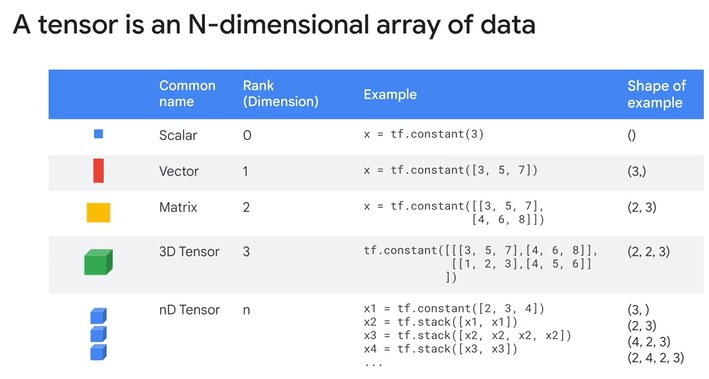

*tf.constant* will produce tensors with constant values, whereas *tf.variable* produces tensors with variable values or ones that can be modified.

In [ ]:
# Create a string tensor, which stores one string, tf.string (data type is second)
string = tf.Variable("this is a string", tf.string)
# Create a number tensor, which stores integer value
number = tf.Variable(324, tf.int16)
floating = tf.Variable(3.567, tf.float64)

In [ ]:
# This is a scalar
string.shape

TensorShape([])

###Rank/Degree of Tensors
Another word for rank is degree, these terms simply mean the number of dimensions involved in the tensor. What we created above is a *tensor of rank 0*, also known as a scalar.

Now we'll create some tensors of higher degrees/ranks.

In [ ]:
# When we have a list or an array, we have at least rank one, because an array can store more than one value in one dimension
rank1_tensor = tf.Variable(["Test", "Ok", "Kathi"], tf.string) # rank-one tensor (one list, one array)
rank2_tensor = tf.Variable([["test", "ok"], ["test", "yes"]], tf.string) # rank two tensor (because we have lists inside of a list, this is now a matrices)

We can determine the rank of a tensor is the deepest level of nested lists (at least with Python)

**To determine the rank** of a tensor we can call the following method.

In [ ]:
tf.rank(rank2_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

The rank of a tensor is direclty related to the deepest level of nested lists. You can see in the first example ```["Test"]``` is a rank 1 tensor as the deepest level of nesting is 1.
Where in the second example ```[["test", "ok"], ["test", "yes"]]``` is a rank 2 tensor as the deepest level of nesting is 2.

###Shape of Tensors
Now that we've talked about the rank of tensors it's time to talk about the shape. The shape of a tensor is simply the number of elements that exist in each dimension. TensorFlow will try to determine the shape of a tensor but sometimes it may be unknown.

To **get the shape** of a tensor we use the shape attribute.


In [ ]:
rank2_tensor.shape # we have two lists with two elements inside of each list

TensorShape([2, 2])

In [ ]:
rank1_tensor.shape

TensorShape([3])

###Changing Shape
The number of elements of a tensor is the product of the sizes of all its shapes. There are often many shapes that have the same number of elements, making it convient to be able to change the shape of a tensor.

The example below shows how to change the shape of a tensor.

In [ ]:
tensor1 = tf.ones([1,2,3])  # tf.ones() creates a shape [1,2,3] tensor full of ones
tensor2 = tf.reshape(tensor1, [2,3,1])  # reshape existing data to shape [2,3,1]
tensor3 = tf.reshape(tensor2, [3, -1])  # -1 tells the tensor to calculate the size of the dimension in that place
                                        # this will reshape the tensor to [3,3]

# The numer of elements in the reshaped tensor MUST match the number in the original

Now let's have a look at our different tensors.

In [ ]:
print(tensor1)
print(tensor2)
print(tensor3)
# Notice the changes in shape

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


###Slicing Tensors
You may be familiar with the term "slice" in python and its use on lists, tuples etc. Well the slice operator can be used on tensors to select specific axes or elements.

When we slice or select elements from a tensor, we can use comma seperated values inside the set of square brackets. Each subsequent value refrences a different dimension of the tensor.

Ex: ```tensor[dim1, dim2, dim3]```

I've included a few examples that will hopefully help illustrate how we can manipulate tensors with the slice operator.

In [ ]:
# Creating a 2D tensor
matrix = [[1,2,3,4,5],
          [6,7,8,9,10],
          [11,12,13,14,15],
          [16,17,18,19,20]]

tensor = tf.Variable(matrix, dtype=tf.int32)
print(tf.rank(tensor))
print(tensor.shape)

In [ ]:
# Now lets select some different rows and columns from our tensor

three = tensor[0,2]  # selects the 3rd element from the 1st row
print(three)  # -> 3

row1 = tensor[0]  # selects the first row
print(row1)

column1 = tensor[:, 0]  # selects the first column
print(column1)

row_2_and_4 = tensor[1::2]  # selects second and fourth row
print(row2and4)

column_1_in_row_2_and_3 = tensor[1:3, 0]
print(column_1_in_row_2_and_3)


###Types of Tensors
Before we go to far, I will mention that there are diffent types of tensors. These are the most used and we will talk more in depth about each as they are used.
- Variable
- Constant
- Placeholder
- SparseTensor

With the execption of ```Variable``` all these tensors are immuttable, meaning their value may not change during execution.

For now, it is enough to understand that we use the Variable tensor when we want to potentially change the value of our tensor.



#Sources
Most of the information is taken direclty from the TensorFlow website which can be found below.

https://www.tensorflow.org/guide/tensor

# Training on large datasets with *tf.data* API

## tf.data.Datasets
- Create data pipelines from
-- in-memory dictionary and lists of tensors
-- out-of-memory sharded data files
- Preprocess data in parallel (and cache result of costly operations)
-- dataset = dataset.map(preproc_func).cache()
- Configure the way the data is fed into a model with a number of chaining methods
-- dataset = dataset.shuffle(1000).repeat(epochs).batch(batch_size, drop_remainder = True)


**Datasets can be created from different file formats**
- *textLineDataset* is comprised of one or more text files
- *TFRecordDataset*
- *FixedLengthRecordDataset* is a dataset object from FixedLengthRecords

### Creating a dataset from in-memory tensors


In [2]:
# def create_dataset(X,Y, epochs, batch_size):
#   dataset = tf.data.Dataset.from_tensor_slices((X,Y))
#   dataset = dataset.repeat(epochs).batch(batch_size, drop_remainer = True)
#   return dataset

*from_tensor* combines the input and returns a dataset with a single element
*from_tensor_slices* creates a dataset with a separate element for each row of the input tensor.

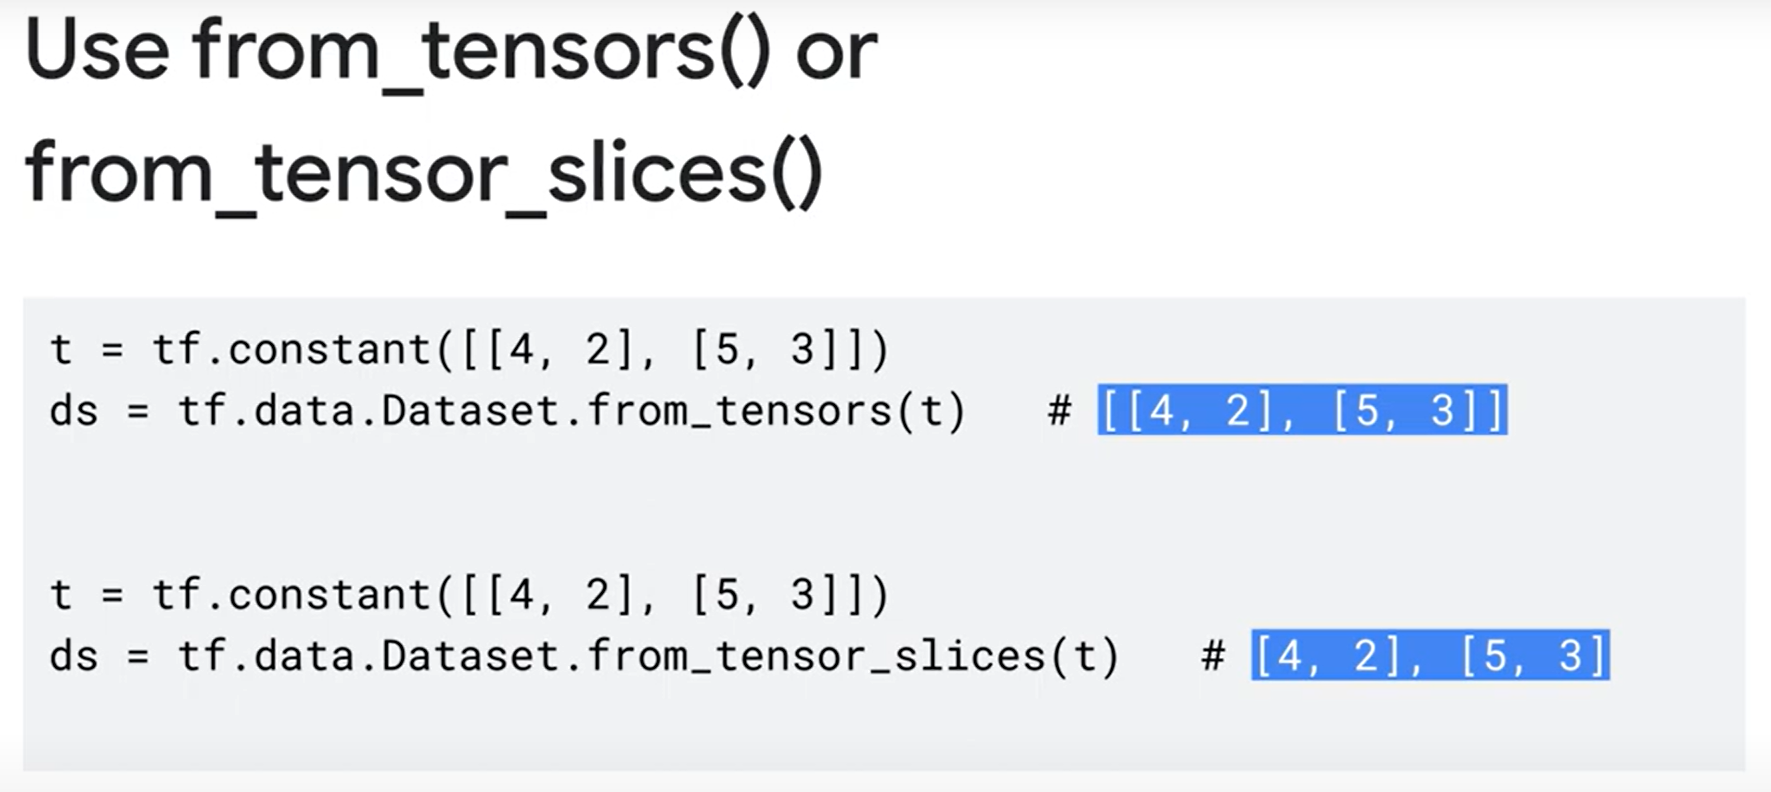

Example:
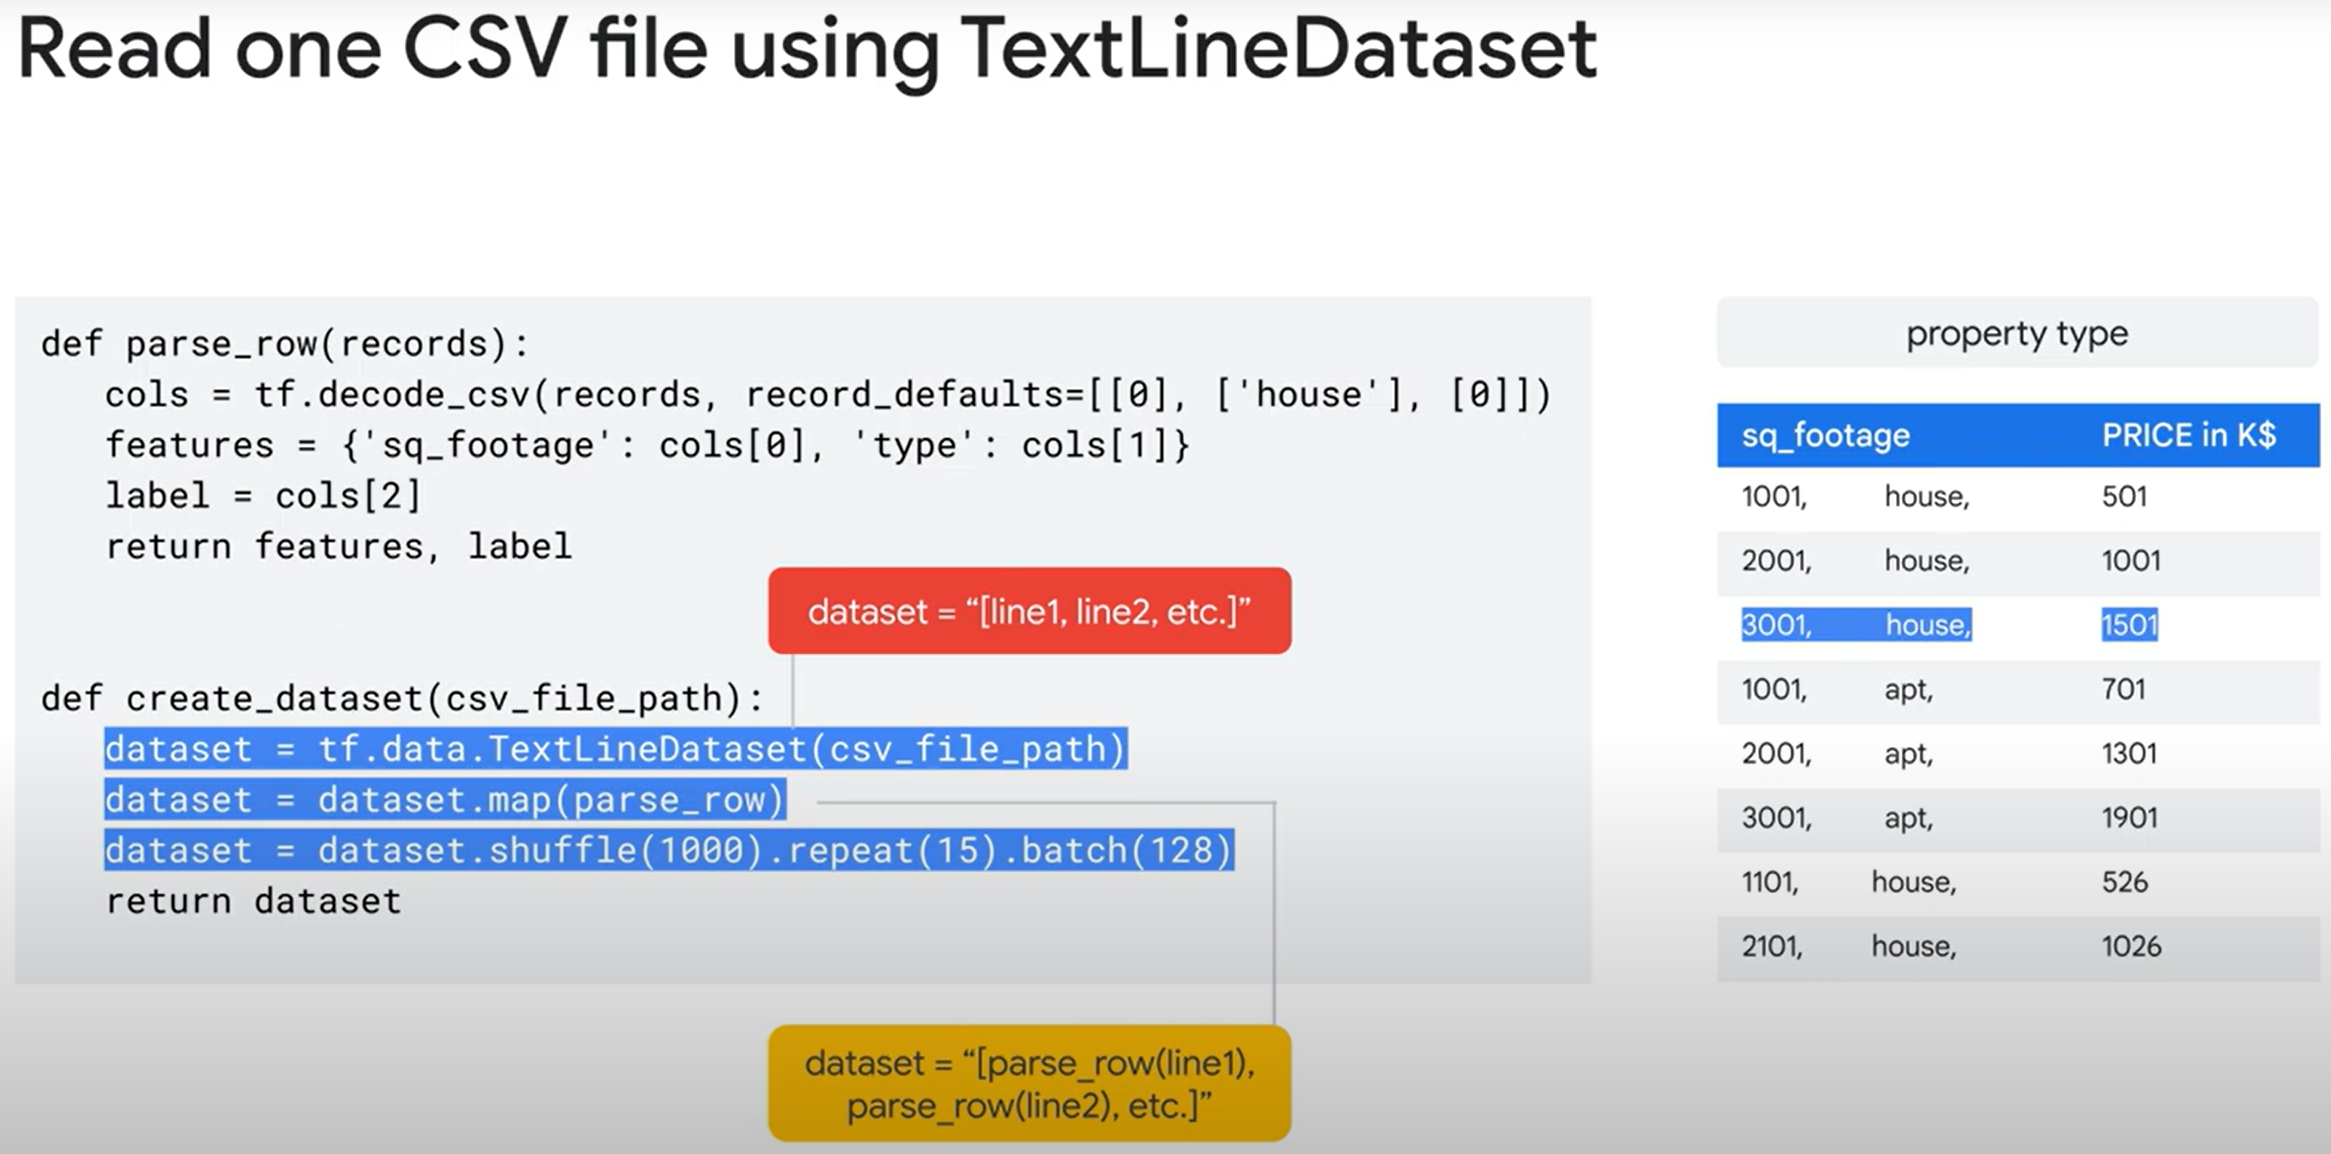


- The TextLineDataset instantiation expects a file name, and it has optional arguments, for example, like the type of compression of the files or the number of parallel reads.
- The map function is responsible for parsing each row of the CSV file.It returns a dictionary from the file content.
- Once that's done, shuffling, and batching and prefetching are steps that can be applied to the dataset to allow the data to be fed into the training loop iteratively.

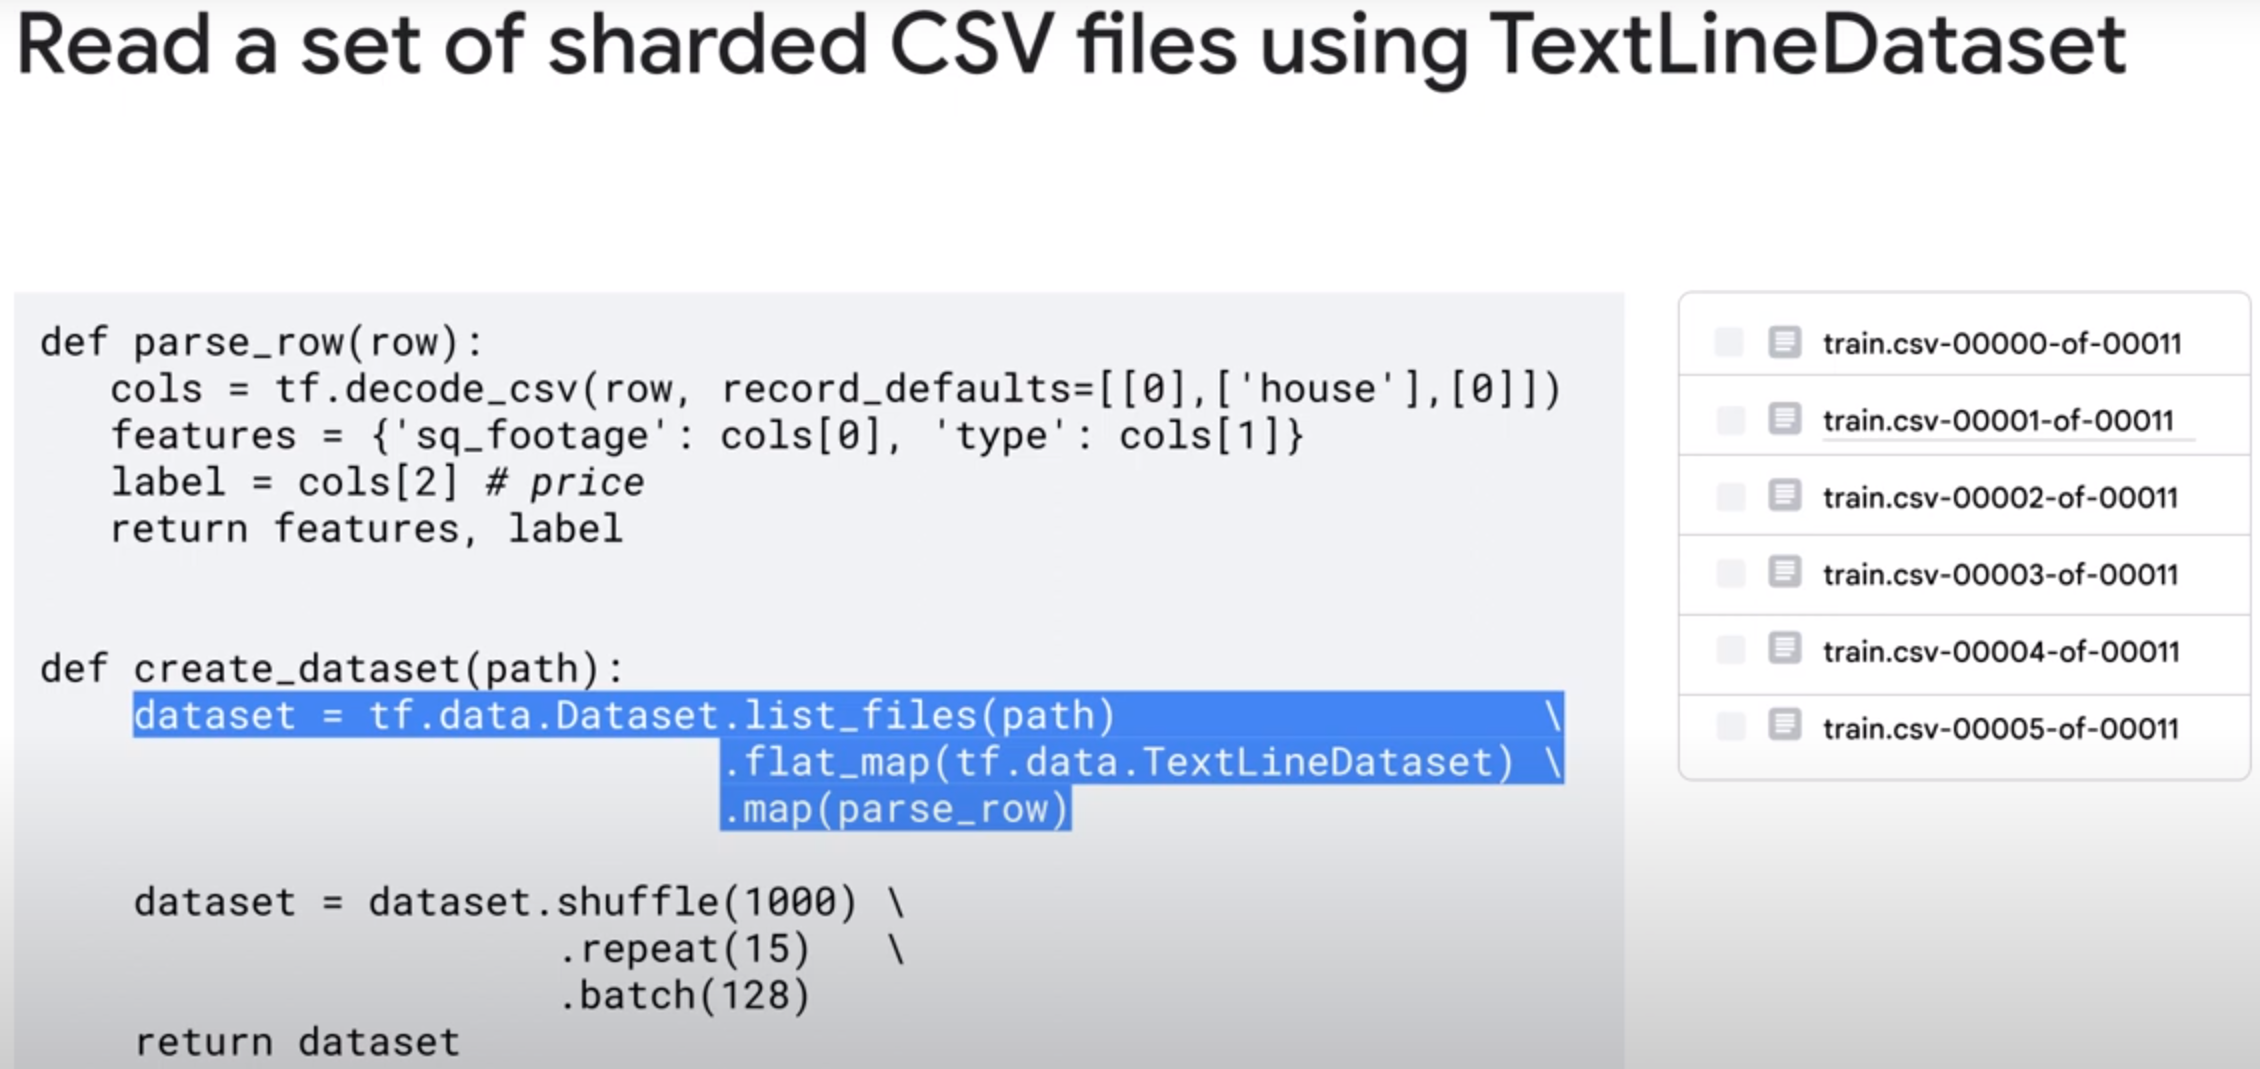

- Load the dataset of file names using *Dataset.list_files* functions
- Use *TextLineDataset* to load the files and turn each file name into a dataset of text lines
- Flat map all of them together into a single dataset and then map each line of text
- Use map to apply the CSV parsing algorithm, and finally obtain a dataset of features and labels

- MAP: Parse a line of text (one-to-one-transformation)
- FLAT_MAP: When loading a file with TextLineDataset, one file name becomes a collection of text file (onte-to-many transformation), flatten all the resulting TextLineDatasets into one

**Pre-fetching**
- allows for subsequent batches to be prepared as soon as their previous batches have been sent away for computation
- by combining prefetching and multi-threaded loading and preprocessing, you can achieve a very good performance by making sure that each of your GPUs or CPUs are constantly busy



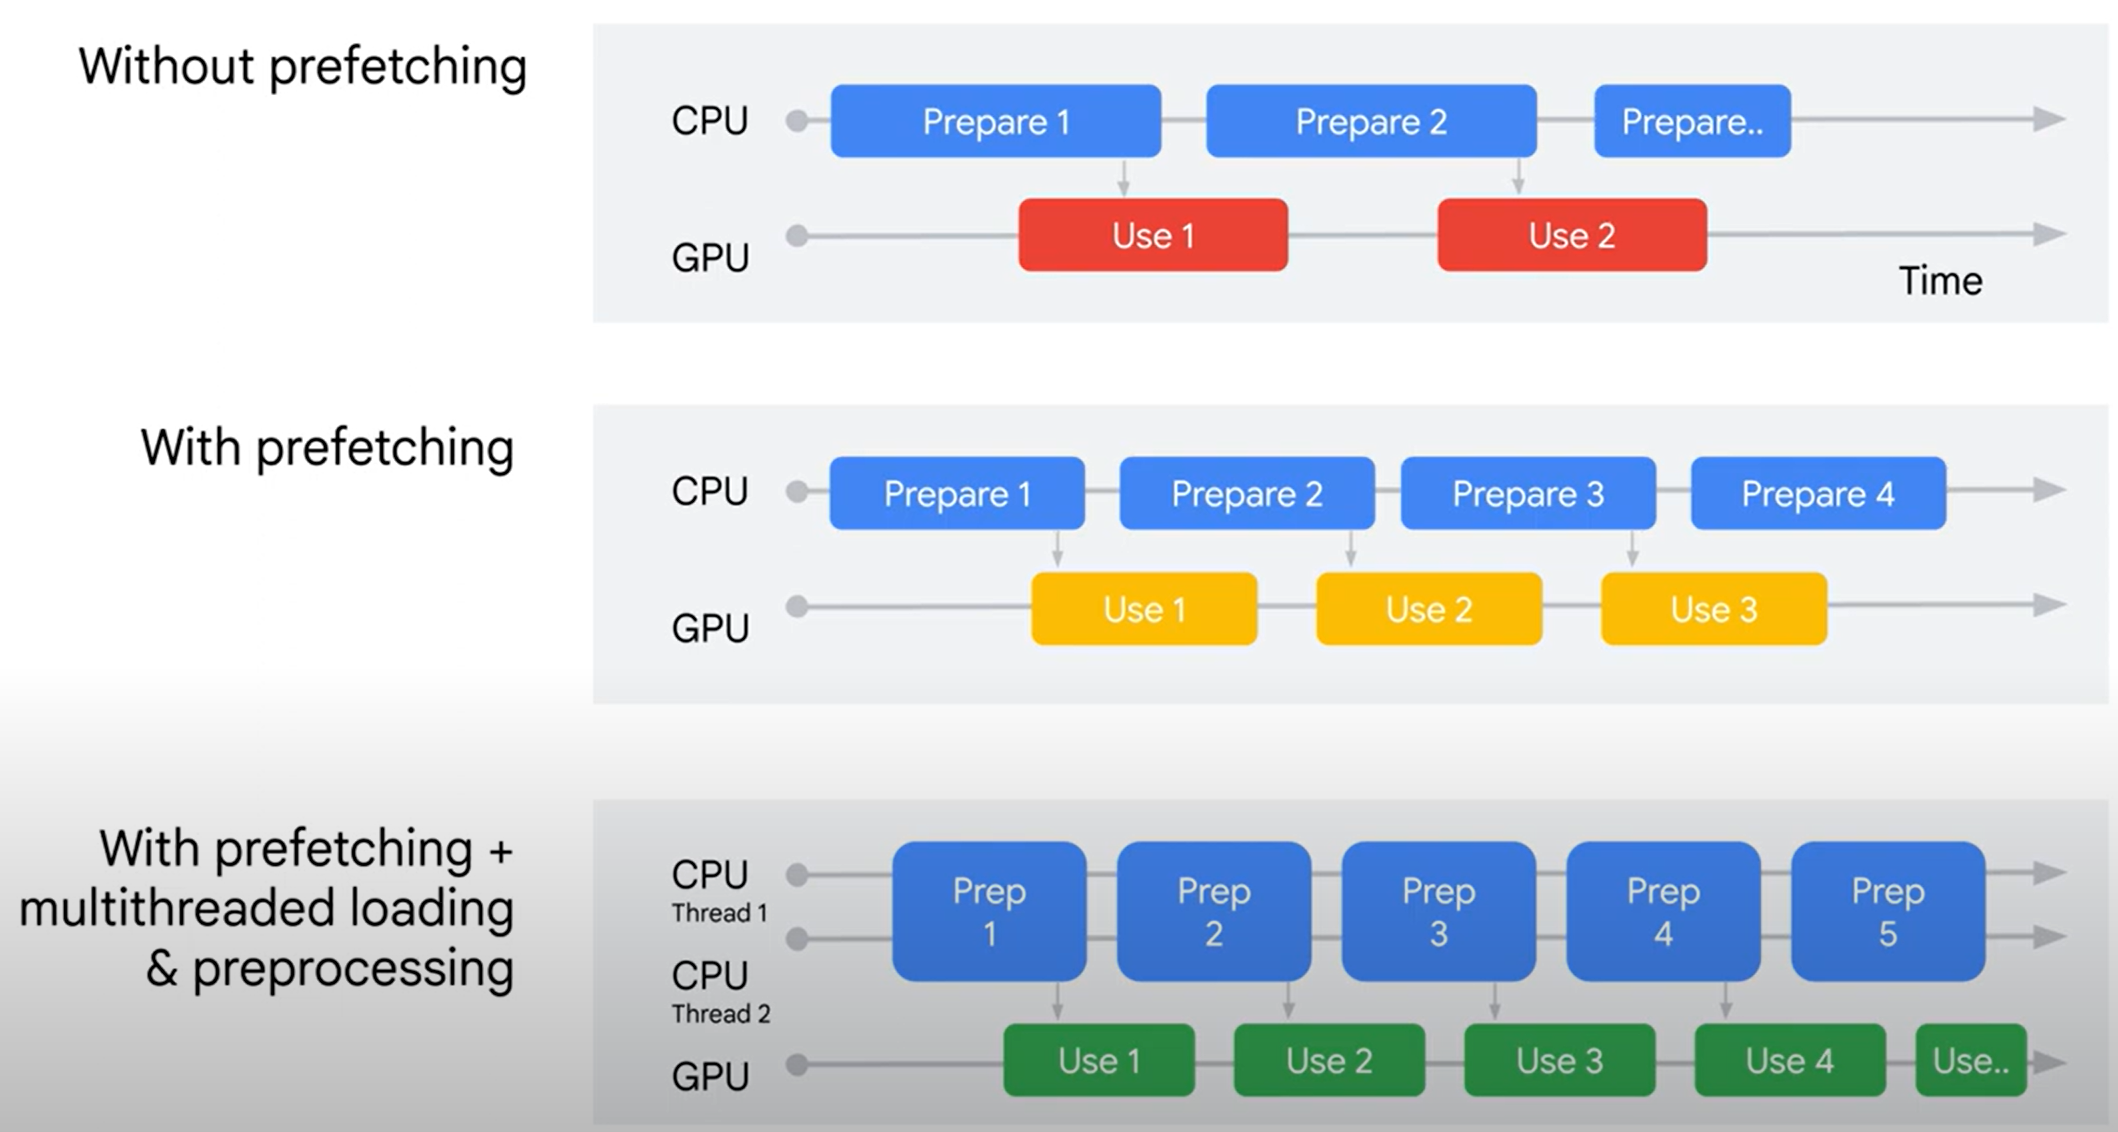